In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel('/config/workspace/dataset/recession_prediction.xls')

In [4]:
df.head()

,Date,10 Year Treasury Yield,3 Month Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread,Rec_prob,NBER_Rec
0,1959-01-31,4.02,2.82,2.879694,1.140306,0.104719,0
1,1959-02-28,3.96,2.70,2.756312,1.203688,0.097620,0
2,1959-03-31,3.99,2.80,2.859125,1.130875,0.105806,0
3,1959-04-30,4.12,2.95,3.013443,1.106557,0.108648,0
4,1959-05-31,4.31,2.84,2.900265,1.409735,0.076983,0


In [5]:
df.shape

(777, 7)

In [6]:
df.describe()

,Date,10 Year Treasury Yield,3 Month Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread,Rec_prob,NBER_Rec
count,777,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,1991-05-31 14:06:56.988417024,5.797954,4.350129,4.486045,1.311909,0.143842,0.122265
min,1959-01-31 00:00:00,0.620000,0.010000,0.010139,-3.505137,0.000795,0.000000
25%,1975-03-31 00:00:00,3.860000,1.950000,1.986877,0.420914,0.022335,0.000000
50%,1991-05-31 00:00:00,5.360000,4.440000,4.552764,1.361503,0.081488,0.000000
75%,2007-07-31 00:00:00,7.520000,5.960000,6.135208,2.329290,0.211931,0.000000
max,2023-09-30 00:00:00,15.320000,16.300000,17.236584,4.145955,0.954049,1.000000
std,NaN,2.933061,3.152233,3.288649,1.272944,0.165709,0.327803


In [7]:
df.isnull().sum()

Date                                              0
10 Year Treasury Yield                            0
3 Month Treasury Yield                            0
3 Month Treasury Yield (Bond Equivalent Basis)    0
Spread                                            0
Rec_prob                                          0
NBER_Rec                                          0
dtype: int64

In [8]:
df['Date']

0     1959-01-31
1     1959-02-28
2     1959-03-31
3     1959-04-30
4     1959-05-31
         ...    
772   2023-05-31
773   2023-06-30
774   2023-07-31
775   2023-08-31
776   2023-09-30
Name: Date, Length: 777, dtype: datetime64[ns]

In [9]:
df.head(50)

,Date,10 Year Treasury Yield,3 Month Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread,Rec_prob,NBER_Rec
0,1959-01-31,4.02,2.82,2.879694,1.140306,0.104719,0
1,1959-02-28,3.96,2.70,2.756312,1.203688,0.097620,0
2,1959-03-31,3.99,2.80,2.859125,1.130875,0.105806,0
3,1959-04-30,4.12,2.95,3.013443,1.106557,0.108648,0
4,1959-05-31,4.31,2.84,2.900265,1.409735,0.076983,0
5,1959-06-30,4.34,3.21,3.281208,1.058792,0.114388,0
6,1959-07-31,4.40,3.20,3.270902,1.129098,0.106012,0
7,1959-08-31,4.43,3.38,3.456476,0.973524,0.125167,0
8,1959-09-30,4.68,4.04,4.138373,0.541627,0.190474,0
9,1959-10-31,4.53,4.05,4.148723,0.381277,0.219274,0


In [10]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day


In [11]:
df.head()

,Date,10 Year Treasury Yield,3 Month Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread,Rec_prob,NBER_Rec,year,month,day
0,1959-01-31,4.02,2.82,2.879694,1.140306,0.104719,0,1959,1,31
1,1959-02-28,3.96,2.70,2.756312,1.203688,0.097620,0,1959,2,28
2,1959-03-31,3.99,2.80,2.859125,1.130875,0.105806,0,1959,3,31
3,1959-04-30,4.12,2.95,3.013443,1.106557,0.108648,0,1959,4,30
4,1959-05-31,4.31,2.84,2.900265,1.409735,0.076983,0,1959,5,31


In [12]:
df.isnull().sum()

Date                                              0
10 Year Treasury Yield                            0
3 Month Treasury Yield                            0
3 Month Treasury Yield (Bond Equivalent Basis)    0
Spread                                            0
Rec_prob                                          0
NBER_Rec                                          0
year                                              0
month                                             0
day                                               0
dtype: int64

In [13]:
df=df.drop('Date',axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   10 Year Treasury Yield                          777 non-null    float64
 1   3 Month Treasury Yield                          777 non-null    float64
 2   3 Month Treasury Yield (Bond Equivalent Basis)  777 non-null    float64
 3   Spread                                          777 non-null    float64
 4   Rec_prob                                        777 non-null    float64
 5   NBER_Rec                                        777 non-null    int64  
 6   year                                            777 non-null    int32  
 7   month                                           777 non-null    int32  
 8   day                                             777 non-null    int32  
dtypes: float64(5), int32(3), int64(1)
memory usa

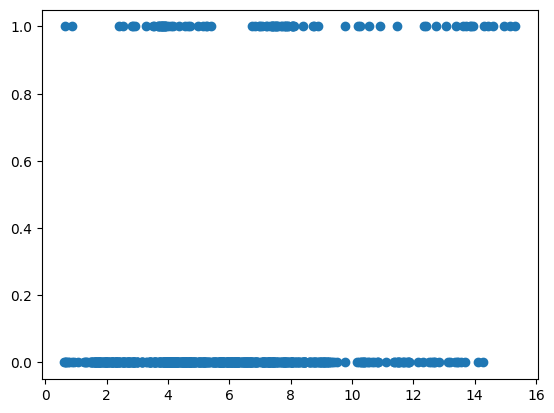

In [15]:
plt.scatter(x='10 Year Treasury Yield',y='NBER_Rec',data=df)
plt.show()

In [16]:
# Recession year wise:
df.groupby(['year'],as_index=False)['NBER_Rec'].value_counts().sort_values(by='NBER_Rec',ascending=True).min()

year        1959
NBER_Rec       0
count          1
dtype: int64

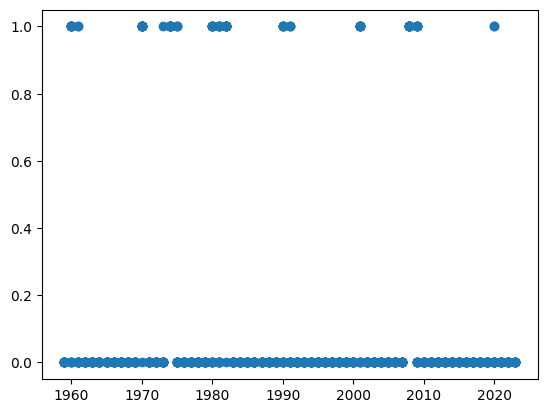

In [17]:
plt.scatter(x='year',y='NBER_Rec',data=df)
plt.show()

/tmp/ipykernel_483/1705408248.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['year'])


<Axes: xlabel='year', ylabel='Density'>

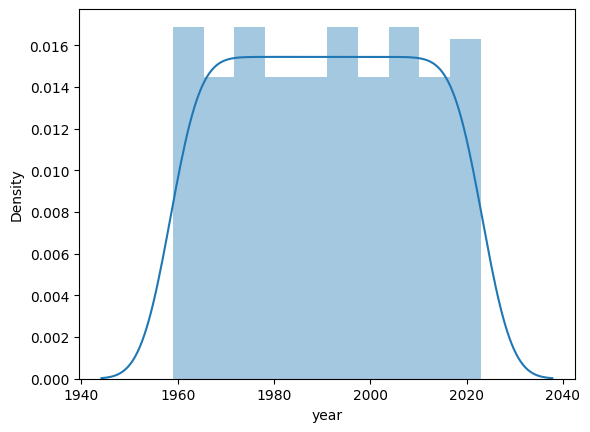

In [18]:
sns.distplot(df['year'])

In [19]:
X=df.drop('NBER_Rec',axis=1)
y=df['NBER_Rec']

In [20]:
X

,10 Year Treasury Yield,3 Month Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread,Rec_prob,year,month,day
0,4.02,2.82,2.879694,1.140306,0.104719,1959,1,31
1,3.96,2.70,2.756312,1.203688,0.097620,1959,2,28
2,3.99,2.80,2.859125,1.130875,0.105806,1959,3,31
3,4.12,2.95,3.013443,1.106557,0.108648,1959,4,30
4,4.31,2.84,2.900265,1.409735,0.076983,1959,5,31
...,...,...,...,...,...,...,...,...
772,3.57,5.14,5.279991,-1.709991,0.708540,2023,5,31
773,3.75,5.16,5.300807,-1.550807,0.673054,2023,6,30
774,3.90,5.25,5.394506,-1.494506,0.660095,2023,7,31
775,4.17,5.30,5.446580,-1.276580,0.608256,2023,8,31


In [21]:
y

0      0
1      0
2      0
3      0
4      0
      ..
772    0
773    0
774    0
775    0
776    0
Name: NBER_Rec, Length: 777, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import  GridSearchCV

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)


In [24]:
from sklearn.preprocessing import StandardScaler

import pickle 
def scaler_standard(X_train,X_test):
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)

    #Saving the model
    file=open('/config/workspace/model/standardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return X_train_scaled,X_test_scaled

In [25]:
X_train_scaled,X_test_scaled=scaler_standard(X_train,X_test)

In [26]:
log_params={
    'penalty':['l1','l2','elasticnet'],
    'C': np.logspace(-3,3,7),
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']
}
grid=GridSearchCV(LogisticRegression(),param_grid=log_params,cv=5,scoring='accuracy')

In [27]:
grid.fit(X_train_scaled,y_train)

/config/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/config/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/config/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/config/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/config/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/config/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky']},
             scoring='accuracy')

In [28]:
grid.best_params_

{'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [29]:
log_clf=LogisticRegression(C=100,penalty='l1',solver='liblinear')

In [30]:
log_clf.fit(X_train_scaled,y_train)

/config/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [31]:
y_log_clf=log_clf.predict(X_test_scaled)

In [32]:
y_log_clf

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [34]:
print(confusion_matrix(y_test,y_log_clf))
print(classification_report(y_test,y_log_clf))
print(accuracy_score(y_test,y_log_clf))

[[138   2]
 [ 15   1]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       140
           1       0.33      0.06      0.11        16

    accuracy                           0.89       156
   macro avg       0.62      0.52      0.52       156
weighted avg       0.84      0.89      0.86       156

0.8910256410256411


In [35]:
svc_params={
    'C':[0.1,1,10],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma':[1, 0.1, 0.01, 0.001, 0.0001]
}
grid=GridSearchCV(SVC(),param_grid=svc_params,cv=3,verbose=3,refit=True,scoring='accuracy')

In [36]:
grid.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.874 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.874 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.870 total time=   0.0s
[CV 1/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.865 total time=   0.1s
[CV 2/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.884 total time=   0.2s
[CV 3/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.874 total time=   0.1s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.874 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.874 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.870 total time=   0.0s
[CV 1/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.874 total time=   0.0s
[CV 2/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.874 total time=   0.0s
[CV 3/3] END ....C=0.1, gamma=1, kernel=sigmoid

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [37]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}

In [38]:
svc_clf=SVC(C=1,gamma=0.1,kernel='poly')

In [39]:
svc_clf.fit(X_train_scaled,y_train)

SVC(C=1, gamma=0.1, kernel='poly')

In [40]:
y_svc_clf=svc_clf.predict(X_test_scaled)
y_svc_clf

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [41]:
print(confusion_matrix(y_test,y_svc_clf))
print(classification_report(y_test,y_svc_clf))
print(accuracy_score(y_test,y_svc_clf))

[[140   0]
 [ 15   1]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       140
           1       1.00      0.06      0.12        16

    accuracy                           0.90       156
   macro avg       0.95      0.53      0.53       156
weighted avg       0.91      0.90      0.86       156

0.9038461538461539


In [42]:
from sklearn.tree import  DecisionTreeClassifier
parameters={
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best','random'],
}
grid=GridSearchCV(DecisionTreeClassifier(),param_grid=parameters,cv=3,verbose=3,scoring='accuracy')

In [43]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END .....criterion=gini, splitter=best;, score=0.874 total time=   0.0s
[CV 2/3] END .....criterion=gini, splitter=best;, score=0.913 total time=   0.0s
[CV 3/3] END .....criterion=gini, splitter=best;, score=0.874 total time=   0.0s
[CV 1/3] END ...criterion=gini, splitter=random;, score=0.879 total time=   0.0s
[CV 2/3] END ...criterion=gini, splitter=random;, score=0.908 total time=   0.0s
[CV 3/3] END ...criterion=gini, splitter=random;, score=0.884 total time=   0.0s
[CV 1/3] END ..criterion=entropy, splitter=best;, score=0.908 total time=   0.0s
[CV 2/3] END ..criterion=entropy, splitter=best;, score=0.932 total time=   0.0s
[CV 3/3] END ..criterion=entropy, splitter=best;, score=0.870 total time=   0.0s
[CV 1/3] END criterion=entropy, splitter=random;, score=0.918 total time=   0.0s
[CV 2/3] END criterion=entropy, splitter=random;, score=0.928 total time=   0.0s
[CV 3/3] END criterion=entropy, splitter=random;,

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [44]:
grid.best_params_

{'criterion': 'log_loss', 'splitter': 'random'}

In [45]:
y_decision_clf=DecisionTreeClassifier(criterion='gini',splitter='random')

In [46]:
y_decision_clf.fit(X_train,y_train)

DecisionTreeClassifier(splitter='random')

In [47]:
y_decision_pred=y_decision_clf.predict(X_test)
y_decision_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0])

In [48]:
print(confusion_matrix(y_test,y_decision_pred))
print(classification_report(y_test,y_decision_pred))
print(accuracy_score(y_test,y_decision_pred))

[[131   9]
 [  6  10]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       140
           1       0.53      0.62      0.57        16

    accuracy                           0.90       156
   macro avg       0.74      0.78      0.76       156
weighted avg       0.91      0.90      0.91       156

0.9038461538461539


In [49]:
import pickle
file = open('/config/workspace/model/ModelForPrediction.pkl','wb')
pickle.dump(y_decision_clf,file)
file.close()